# Face Match com DeepFace
Dataset completo: https://www.kaggle.com/datasets/vishesh1412/celebrity-face-image-dataset

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import time

import cv2
import numpy as np
from PIL import Image
from deepface import DeepFace

In [2]:
# Versions
import sys
import tensorflow as tf
print(sys.version)
print(DeepFace.__version__)
print(tf.__version__)

3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:12:24) [GCC 11.2.0]
0.0.92
2.17.0


## Comparar 2 pessoas
O "verify" irá detectar as faces, comparar e retornar se são a mesma pessoa, assim como a localização das faces detectas.

In [4]:
result = DeepFace.verify(
    img1_path = 'celebrity_faces/Robert Downey Jr/010_991a88dc.jpg',
    #img1_path = 'celebrity_faces/Will Smith/009_a023db5b.jpg',
    img2_path = 'celebrity_faces/Robert Downey Jr/012_e3dd7d69.jpg',
)

In [5]:
result

{'verified': True,
 'distance': 0.653677033232047,
 'threshold': 0.68,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 85,
   'y': 106,
   'w': 325,
   'h': 325,
   'left_eye': (301, 234),
   'right_eye': (193, 239)},
  'img2': {'x': 167,
   'y': 85,
   'w': 206,
   'h': 206,
   'left_eye': (307, 172),
   'right_eye': (231, 169)}},
 'time': 0.19}

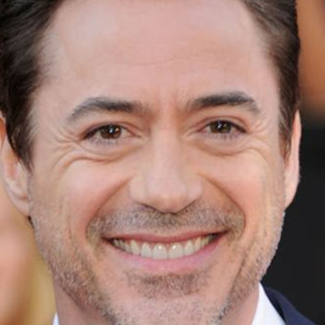

In [6]:
img = Image.open('celebrity_faces/Robert Downey Jr/010_991a88dc.jpg')
#img = Image.open('celebrity_faces/Will Smith/009_a023db5b.jpg',)
coords = result['facial_areas']['img1']
img.crop([coords['x'], coords['y'], coords['x']+coords['w'], coords['y']+coords['h']])
#img[coords['y']:coords['y']+coords['h'], coords['x']:coords['x']+coords['w']]  # Opencv

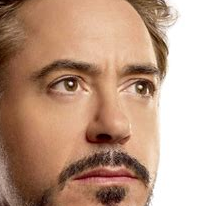

In [7]:
img = Image.open('celebrity_faces/Robert Downey Jr/012_e3dd7d69.jpg')
coords = result['facial_areas']['img2']
img.crop([coords['x'], coords['y'], coords['x']+coords['w'], coords['y']+coords['h']])
#img[coords['y']:coords['y']+coords['h'], coords['x']:coords['x']+coords['w']]  # Opencv

# Comparar pessoa com banco de dados
O "find" irá detectar as faces da imagem informada e buscar na base de dados todas as imagens quem possui as faces encontradas.

In [8]:
result = DeepFace.find(
    img_path = 'celebrity_faces/Jennifer Lawrence/003_963a3627.jpg',
    db_path = 'celebrity_faces',
)

24-07-18 09:04:36 - Searching celebrity_faces/Jennifer Lawrence/003_963a3627.jpg in 53 length datastore
24-07-18 09:04:36 - find function duration 0.162217378616333 seconds


In [9]:
result[0]

,identity,hash,target_x,target_y,target_w,target_h,source_x,source_y,source_w,source_h,threshold,distance
0,celebrity_faces/Jennifer Lawrence/009_bcd380a7...,a602699a8a725b9e31709c9c6bee17f943a1aa79,159,67,142,142,151,86,170,170,0.68,0.051253
1,celebrity_faces/Jennifer Lawrence/003_963a3627...,d946b369939e4d7ec1b15a5f4cb76a5cd4dabf69,151,86,170,170,151,86,170,170,0.68,0.065143
2,celebrity_faces/Jennifer Lawrence/010_34d63b53...,cd118510046e8be44e1f688b5f533795b53afe9a,159,102,302,302,151,86,170,170,0.68,0.311944
3,celebrity_faces/Jennifer Lawrence/006_2d0dccd4...,f0cc53b26f6cdfa4fb22eb829cc54c4d9e43e688,127,65,109,109,151,86,170,170,0.68,0.446795
4,celebrity_faces/Jennifer Lawrence/011_8c50c05f...,10ac633c4351a4c5a5909f2a5e1ec9f0921c1167,178,77,211,211,151,86,170,170,0.68,0.456021
5,celebrity_faces/Jennifer Lawrence/001_21a7d5e6...,f370b143e8b1302d03a21e0257d77da3337484bb,159,96,192,192,151,86,170,170,0.68,0.458922
6,celebrity_faces/Jennifer Lawrence/008_35fbbb0c...,699be098f6f805923d2121ed82e0f444488bd60f,151,114,234,234,151,86,170,170,0.68,0.460025
7,celebrity_faces/Jennifer Lawrence/012_12d61e14...,a7503941d35814245d83cb1397dca504fb89ad0c,150,80,112,112,151,86,170,170,0.68,0.492835
8,celebrity_faces/Jennifer Lawrence/002_533748b2...,c4901dd077b4c8089ef34dd124795f6e9ac4302f,105,96,255,255,151,86,170,170,0.68,0.517803
9,celebrity_faces/Kate Winslet/012_a2bb90dc.jpg,d65fe49a1bd674a4d46090607b360cd1ba8d5658,108,52,254,254,151,86,170,170,0.68,0.604843


# Detectar e coletar somente a face das pessoas
O "extract_faces" retorna a face das pessoas em formato de imagem RGB normalizada.

In [10]:
faces = DeepFace.extract_faces(
    img_path = 'celebrity_faces/Will Smith/006_bbb6978e.jpg',
)

In [11]:
faces[0]

{'face': array([[[0.37647059, 0.34901961, 0.27843137],
         [0.37647059, 0.34901961, 0.27843137],
         [0.38039216, 0.35294118, 0.28235294],
         ...,
         [0.14117647, 0.14117647, 0.14117647],
         [0.14117647, 0.14117647, 0.14117647],
         [0.14901961, 0.14901961, 0.14901961]],
 
        [[0.38039216, 0.35294118, 0.28235294],
         [0.37647059, 0.34901961, 0.27843137],
         [0.38039216, 0.35294118, 0.28235294],
         ...,
         [0.15686275, 0.15686275, 0.15686275],
         [0.15686275, 0.15686275, 0.15686275],
         [0.15294118, 0.15294118, 0.15294118]],
 
        [[0.38039216, 0.35294118, 0.28235294],
         [0.37647059, 0.34901961, 0.27843137],
         [0.38039216, 0.35294118, 0.28235294],
         ...,
         [0.11764706, 0.11764706, 0.11764706],
         [0.15686275, 0.15686275, 0.15686275],
         [0.16078431, 0.16078431, 0.16078431]],
 
        ...,
 
        [[0.28627451, 0.17647059, 0.14509804],
         [0.29019608, 0.17647059,

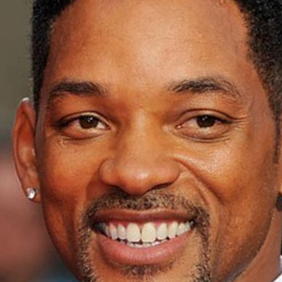

In [12]:
Image.fromarray((faces[0]['face']*255).astype(np.uint8))

# Gerar embedding das faces
O "represent" irá detectar as faces da imagem informada e realizar o embedding (pegar as características das faces), permitindo que elas sejam armazenadas para fazer comparações personalizadas.

In [13]:
embeddings = DeepFace.represent(
    img_path = 'celebrity_faces/Jennifer Lawrence/003_963a3627.jpg', # faces[0]['face']
    #detector_backend='skip'
)

In [14]:
embeddings[0]

{'embedding': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.021400005873206535,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.13730220093130457,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.029042782378128483,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.04458342957537111,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.01237265712048272,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.02437457614295464,
  0.0,
  0.007577597583914995,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.02497299671414054,
  0.0,
  0.0,
  0.0,
  0.010961457875110431,
  0.0,
  0.0,
  0.001289595342597489,
  0.0,
  0.04155491744802545,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.1157889942451771,
  0.03534629858627702,
  0.0,
  0.0,
  0.0,
  0.0,
  0.004136240490787466,
  0.0,
  0.0,
  

In [15]:
embeddings2 = DeepFace.represent(
    img_path = 'celebrity_faces/Jennifer Lawrence/008_35fbbb0c.jpg',
)

In [16]:
from deepface.modules.verification import find_cosine_distance, find_euclidean_distance, l2_normalize

In [17]:
find_cosine_distance(embeddings[0]['embedding'], embeddings2[0]['embedding'])

0.4600251709805231

In [18]:
result = DeepFace.verify(
    img1_path = 'celebrity_faces/Jennifer Lawrence/003_963a3627.jpg',
    img2_path = 'celebrity_faces/Jennifer Lawrence/008_35fbbb0c.jpg',
)
result

{'verified': True,
 'distance': 0.4600251709805231,
 'threshold': 0.68,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 151,
   'y': 86,
   'w': 170,
   'h': 170,
   'left_eye': (259, 154),
   'right_eye': (206, 152)},
  'img2': {'x': 151,
   'y': 114,
   'w': 234,
   'h': 234,
   'left_eye': (303, 208),
   'right_eye': (225, 208)}},
 'time': 0.2}

# Estimar idade, gênero, raça e emoção dos rostos
O "analyze" irá detectar as faces na imagem informada e conforme solicitado, pode estimar a idade, gênero, raça e emoção das faces encontradas.

In [20]:
objs = DeepFace.analyze(
  img_path = 'celebrity_faces/Jennifer Lawrence/008_35fbbb0c.jpg', 
  actions = ['age', 'gender', 'race', 'emotion'],
)

Action: emotion: 100%|████████████████████████████| 4/4 [00:00<00:00, 19.79it/s]


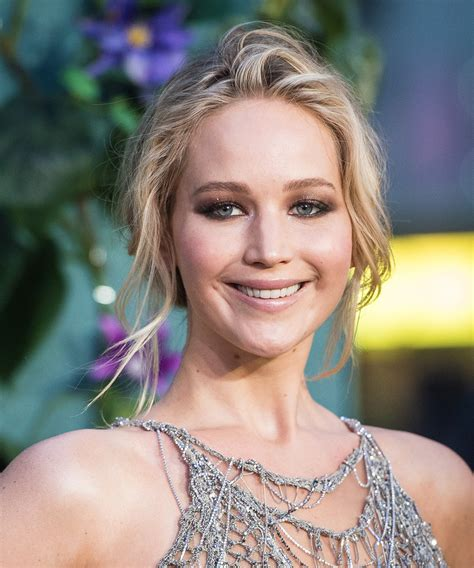

In [21]:
Image.open('celebrity_faces/Jennifer Lawrence/008_35fbbb0c.jpg')

In [22]:
objs[0]

{'age': 28,
 'region': {'x': 151,
  'y': 114,
  'w': 234,
  'h': 234,
  'left_eye': (303, 208),
  'right_eye': (225, 208)},
 'face_confidence': 0.9,
 'gender': {'Woman': 99.99995231628418, 'Man': 4.1855832932924386e-05},
 'dominant_gender': 'Woman',
 'race': {'asian': 5.280318719474933e-06,
  'indian': 1.4541684279723831e-05,
  'black': 9.491763496943997e-08,
  'white': 99.77617858506314,
  'middle eastern': 0.11508929996352195,
  'latino hispanic': 0.10871533952446816},
 'dominant_race': 'white',
 'emotion': {'angry': 3.5310516582074195e-12,
  'disgust': 1.0630421169345737e-17,
  'fear': 8.331384193649427e-10,
  'happy': 99.99794960021973,
  'sad': 1.2902190427155347e-07,
  'surprise': 2.8346783254029617e-08,
  'neutral': 0.002054870310530532},
 'dominant_emotion': 'happy'}

# Detecta faces em um vídeo
O "strean" detecta faces de pessoas em um vídeo, pode ser um vídeo salvo em disco ou em tempo real utilizando uma câmera. Se informar uma base de dados irá informar também quem é a pessoa, caso contrário irá apenas dizer onde está a face, idade, gênero, raça e emoção

In [23]:
#DeepFace.stream(db_path='celebrity_faces', source='video.mp4')  #source=0 == webcam

# Explorando os parâmetros
Todas as funções anteriores possuem diversos parâmetros para customizar as operações, todos podem ser conferídas com mais detalhes em: https://github.com/serengil/deepface/blob/master/deepface/DeepFace.py

## Backends

In [24]:
backends = [
  'opencv', 
  'ssd', 
  'dlib', 
  'mtcnn', 
  'fastmtcnn',
  'retinaface', 
  'mediapipe',
  'yolov8',
  'yunet',
  'centerface',
]

In [25]:
#!pip install mediapipe

In [27]:
# images: Will Smith/006_bbb6978e.jpg; Will Smith/no_face.jpg; Robert Downey Jr/008_79cd0b7b.jpg; Robert Downey Jr/spoof.jpg
for backend in backends:
    print(backend)
    tic = time.time()
    faces = DeepFace.extract_faces(
        img_path = 'celebrity_faces/Will Smith/006_bbb6978e.jpg',  # Image path, base64 or BGR image (uint8)
        detector_backend = backend, # Detector model
        enforce_detection = True,  # If True raise error when not detect face
        align = True,  # Align face
        expand_percentage = 0,  # Add padding in crop face image
        grayscale = False,  # Convert output face image to grayscale
        color_face = 'rgb',  # Convert output face image to rgb, bgr or gray  -- DeepFace >= v0.0.93
        normalize_face = True,  # Whether to normalize output face image (divide by 255)  -- DeepFace >= v0.0.93
        anti_spoofing = False  # Detect if face is the real person
    )
    print(f'Time: {time.time() - tic} - Confidence: {faces[0]['confidence']}')

opencv
Time: 0.16165375709533691 - Confidence: 0.92
ssd
Time: 0.07862997055053711 - Confidence: 1.0
dlib
Time: 0.26395249366760254 - Confidence: 1.0
mtcnn
1/1 [==============================] - 0s 9ms/step
Time: 0.4973931312561035 - Confidence: 1.0
fastmtcnn
Time: 0.10633587837219238 - Confidence: 1.0
retinaface
Time: 0.1083984375 - Confidence: 1.0
mediapipe
Time: 0.03165173530578613 - Confidence: 0.82
yolov8
Time: 0.035175323486328125 - Confidence: 0.86
yunet
Time: 0.044637441635131836 - Confidence: 0.93
centerface
Time: 0.23769211769104004 - Confidence: 0.92


(236, 307)


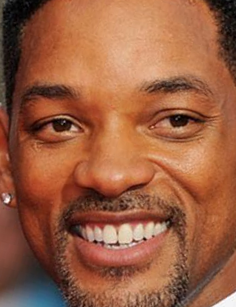

In [28]:
print(Image.fromarray((faces[0]['face']*255).astype(np.uint8)).size)
Image.fromarray((faces[0]['face']*255).astype(np.uint8))

## Models e Metrics

In [29]:
models = [
  'VGG-Face', 
  'Facenet', 
  'Facenet512', 
  'OpenFace', 
  # 'DeepFace',  # Only Tensorflow <= 3.12 version
  'DeepID', 
  'ArcFace', 
  'Dlib', 
  'SFace',
  'GhostFaceNet',
]
metrics = ['cosine', 'euclidean', 'euclidean_l2']

In [30]:
img1 = cv2.imread('celebrity_faces/Robert Downey Jr/010_991a88dc.jpg')
img2 = cv2.imread('celebrity_faces/Robert Downey Jr/012_e3dd7d69.jpg')

In [32]:
for model in models:
    print('---------------------')
    for metric in metrics:
        tic = time.time()
        result = DeepFace.verify(
            img1_path = img1,  # Image path, base64 or BGR image (uint8)
            img2_path = img2,
            model_name = model,  # Embedding model (default: VGG-Face)
            detector_backend = 'opencv',  # Detector model
            distance_metric = metric,  # Metric distance calculator (default: cosine)
            enforce_detection = True,  # If True raise error when not detect face
            align = True,  # Align face
            expand_percentage = 0,  # Add padding in crop face image
            normalization = 'base',  # Normalize the input image before feeding it to the model. Options: base, raw, Facenet, Facenet2018, VGGFace, VGGFace2, ArcFace (default: base)
            silent = False,  # If allow show logging mensagens
            threshold = None,  # Custom distance threshold to accept as same person
            anti_spoofing = False  # Detect if face is the real person
        )
        print(f'Time: {time.time() - tic} - Model: {result["model"]} - Metric: {result["similarity_metric"]} - Verified: {result["verified"]} - Distance: {result["distance"]} - Threshold: {result["threshold"]}')

---------------------
Time: 0.3427882194519043 - Model: VGG-Face - Metric: cosine - Verified: True - Distance: 0.653677033232047 - Threshold: 0.68
Time: 0.34105968475341797 - Model: VGG-Face - Metric: euclidean - Verified: True - Distance: 1.1433958485424434 - Threshold: 1.17
Time: 0.34149670600891113 - Model: VGG-Face - Metric: euclidean_l2 - Verified: True - Distance: 1.1433958485424434 - Threshold: 1.17
---------------------
Time: 0.5287113189697266 - Model: Facenet - Metric: cosine - Verified: True - Distance: 0.35934895034272063 - Threshold: 0.4
Time: 0.5303900241851807 - Model: Facenet - Metric: euclidean - Verified: False - Distance: 10.489145274166628 - Threshold: 10
Time: 0.5263934135437012 - Model: Facenet - Metric: euclidean_l2 - Verified: False - Distance: 0.8477605208344166 - Threshold: 0.8
---------------------
Time: 0.5244746208190918 - Model: Facenet512 - Metric: cosine - Verified: False - Distance: 0.40032542842160124 - Threshold: 0.3
Time: 0.5278031826019287 - Model: 